$p(y=k|x) \propto p(x|y=k) * p(y=k)$

$p([x_1, x_2, x_3, x_4] | y = k) * 0_k$

$\prod_{j=1}^D p(x_j| y = k) * 0_k$

$\prod_{j=1}^D p(x_j| y = k) * 0_k$

posterior distribution $\propto$ [likelihood distribution] * [prior distribution]

In [2]:
y = [1;1;2;2;2;1;2;1]
# p(y=1) = ?, p(y=2) = ?

8-element Vector{Int64}:
 1
 1
 2
 2
 2
 1
 2
 1

In [7]:
θ = zeros(2) # K =2, prior distribution
N = length(y)
θ[1] = sum(y .== 1)/N
θ[2] = sum(y .== 2)/N

0.5

In [10]:
X = [1 1 1 0;
1 1 1 1;
0 1 1 0;
0 0 1 1;
0 0 0 0;
0 0 0 1;
1 0 0 0;
0 1 1 1]

8×4 Matrix{Int64}:
 1  1  1  0
 1  1  1  1
 0  1  1  0
 0  0  1  1
 0  0  0  0
 0  0  0  1
 1  0  0  0
 0  1  1  1

In [11]:
id1 = (y .== 1)
X1 = X[id1, : ]

4×4 Matrix{Int64}:
 1  1  1  0
 1  1  1  1
 0  0  0  1
 0  1  1  1

In [12]:
sum(X1, dims = 1)

1×4 Matrix{Int64}:
 2  3  3  3

In [14]:
id2 = (y .== 2)
X2 = X[id2, : ]

4×4 Matrix{Int64}:
 0  1  1  0
 0  0  1  1
 0  0  0  0
 1  0  0  0

In [16]:
sum(X2, dims=1)

1×4 Matrix{Int64}:
 1  1  2  1

In [24]:
function train(X, y)
    K = length(unique(y)) #number of label
    N, D = size(X) #number of samples and domain dimensions
    θ_k = zeros(K)  
    θ_jk = zeros(D, K)
    for k=1:K
        idk = (y .== k)
        θ_k[k] = sum(idk)
        Xk= X[idk, : ]
        θ_jk[:, k] = sum(Xk, dims = 1) ./ θ_k[k]
    end
    return θ_k/N, θ_jk
end

train (generic function with 1 method)

In [35]:
function classify(θ_k, θ_jk, xNew)
    D, K = size(θ_jk)
    p = zeros(K) #log posterior distributions
    for k=1:K
        s = 0
        for j=1:D #donot use it #vectorization computation.
            s = s + if (xNew[j] == 1) log(θ_jk[j,k]) else log(1 - θ_jk[j,k]) end
        end
        p[k] = log(θ[k]) + s
    end
    return argmax(p)
end

classify (generic function with 1 method)

In [43]:
θ_k, θ_jk= train(X,y)

([0.5, 0.5], [0.5 0.25; 0.75 0.25; 0.75 0.5; 0.75 0.25])

In [46]:
xNew = [1;0;1;0]
yNew = classify(θ_k, θ_jk, xNew)*2
argmax(yNew)

1

In [2]:
using Plots

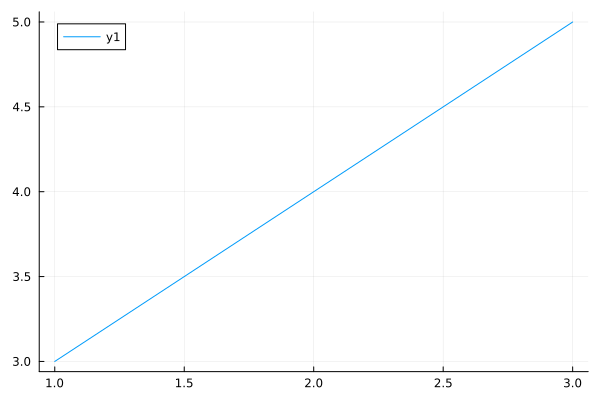

In [4]:
plot([1,2,3], [3,4,5])